<a href="https://colab.research.google.com/github/maeve70/intro-data-capstone-biodiversity/blob/master/BiodiversityProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import math


# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

The two csv files are below from my Drive

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')
#files: species_info.csv https://drive.google.com/file/d/1ueEH5aN1F4fusPtAijJZsamddZ6p7zMg/view?usp=sharing
#observations.csv https://drive.google.com/file/d/1D7r1SBE0RP4HjxaKDiv9k7d01pgMfph3/view?usp=sharing

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
from google.colab import files
uploaded = files.upload()

Saving species_info.csv to species_info.csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving observations.csv to observations.csv


In [6]:
species = pd.read_csv('species_info.csv')
species.head(5)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


how many unique scientific names?

In [7]:
species.scientific_name.nunique()

5541

how many unique species categories?

In [8]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

what are the unique values of conservation status?

In [9]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [10]:
species.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,Species of Concern,151
3,Threatened,10


Since .unique doesn't count NAN  or None values, we have to replace those values with "No Intervention."

In [0]:
species.fillna('No Intervention', inplace=True)

Let's see how many require no protection or intervention.

In [12]:
species.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,No Intervention,5363
3,Species of Concern,151
4,Threatened,10


Let's see what the count of conservation status is by sceintific name. rerun the same .groupby() to get the counts

In [13]:
protection_counts = species.groupby('conservation_status')\
                        .scientific_name.count().reset_index()\
                        .sort_values(by='scientific_name')

print(protection_counts)

  conservation_status  scientific_name
1         In Recovery                4
4          Threatened               10
0          Endangered               16
3  Species of Concern              161
2     No Intervention             5633


Let's make a chart!

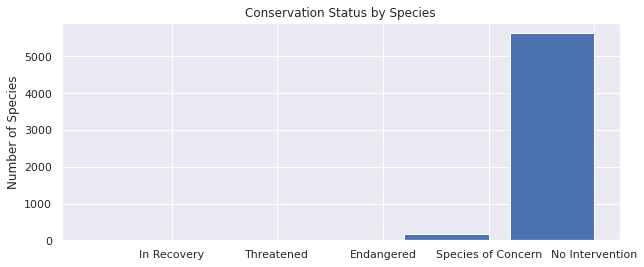

In [14]:
plt.figure(figsize=(10, 4))
ax = plt.subplot()
plt.bar(range(len(protection_counts)),
        protection_counts.scientific_name.values)
ax.set_xticks(0.4 + np.arange(len(protection_counts)))
ax.set_xticklabels(protection_counts.conservation_status.values)
plt.ylabel("Number of Species")
plt.title("Conservation Status by Species")
plt.show()


#ax.set_xticks(0.4 + np.arange(len(obs_by_park)))

Let's create a new column in the dataset called "Is Protected" which would be True or Falsue

In [15]:
species['is_protected'] = species.conservation_status != 'No Intervention'        
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True


Let's groupby category and is_protected

In [0]:
category_counts = species.groupby(['category', 'is_protected'])\
                         .scientific_name.nunique()\
                         .reset_index()

In [17]:
category_counts.head(10)

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115
5,Fish,True,11
6,Mammal,False,146
7,Mammal,True,30
8,Nonvascular Plant,False,328
9,Nonvascular Plant,True,5


Let's pivot the data to read it easier

In [0]:
category_pivot = category_counts.pivot(columns='is_protected',\
                                      index='category', 
                                     values='scientific_name')\
                                .reset_index()


In [20]:
category_pivot

is_protected,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


let's change the cl=olumn names so they're more understandable.

In [0]:
category_pivot.columns =['category', 'not_protected', 'protected']

Let's create a new column called 'percent protected' which is protected/not protected.

In [0]:
category_pivot['percent_protected'] = category_pivot.protected/ \
                                       (category_pivot.not_protected + category_pivot.protected)

In [23]:
category_pivot

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,0.088608
1,Bird,413,75,0.153689
2,Fish,115,11,0.087302
3,Mammal,146,30,0.170455
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


It looks like species in category Mammal are more likely to be endangered than species in Bird. We're going to do a significance test to see if this statement is true. 

So, b/c this is categorical data, we would use a chi square contingency test and fill in the contingency table with the data for mammals and birds

In [0]:
contingency = [[30, 146],
               [75, 413]]

import the chi square function from scipy:

In [0]:
from scipy.stats import chi2_contingency

run chi square contingency with the contingency table above.

In [28]:
chi2, pval, dof, expected = chi2_contingency(contingency)
print(pval)
print(chi2, pval, dof, expected)

0.6875948096661336
0.1617014831654557 0.6875948096661336 1 [[ 27.8313253 148.1686747]
 [ 77.1686747 410.8313253]]


pval isn't significant at 0.687594
Let's try another test between reptile & mammal.

In [30]:
contingency = [[5, 73], [30, 146]]

chi2, pval, dof, expected = chi2_contingency(contingency)
print(pval)
print(chi2, pval, dof, expected)

0.03835559022969898
4.289183096203645 0.03835559022969898 1 [[ 10.7480315  67.2519685]
 [ 24.2519685 151.7480315]]


that's a significant difference between reptile and mammal with a pvalue: 0.0383...

Conservationists have been recording sightings of different species at several national parks for the past 7 days. They've saved sent you their observations in a file called observations.csv. Load observations.csv into a variable called observations, then use head to view the data.

In [31]:
observations = pd.read_csv('observations.csv')
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


Some scientists are studying the number of sheep sightings at different national parks. There are several different scientific names for different types of sheep. We'd like to know which rows of species are referring to sheep. Notice that the following code will tell us whether or not a word occurs in a string:

In [32]:
# Does "Sheep" occur in this string?
str1 = 'This string contains Sheep'
'Sheep' in str1

True

In [33]:
# Does "Sheep" occur in this string?
str2 = 'This string contains Cows'
'Sheep' in str2

False

Use apply and a lambda function to create a new column in species called is_sheep which is True if the common_names contains 'Sheep', and False otherwise.

In [34]:
species['is_sheep'] = species.common_names.apply(lambda x: 'Sheep' in x)
species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


In [35]:
species[species.is_sheep]

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


In [37]:
sheep_species = species[(species.is_sheep) & (species.category =='Mammal')]
sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Now merge `sheep_species` with `observations` to get a DataFrame with observations of sheep.  Save this DataFrame as `sheep_observations`.

In [38]:
sheep_observations = pd.merge(sheep_species, observations)
sheep_observations.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep,park_name,observations
0,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yosemite National Park,126
1,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Great Smoky Mountains National Park,76
2,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Bryce National Park,119
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yellowstone National Park,221
4,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Yellowstone National Park,219


how many sheep observations are there across all three species are there by park?

In [39]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


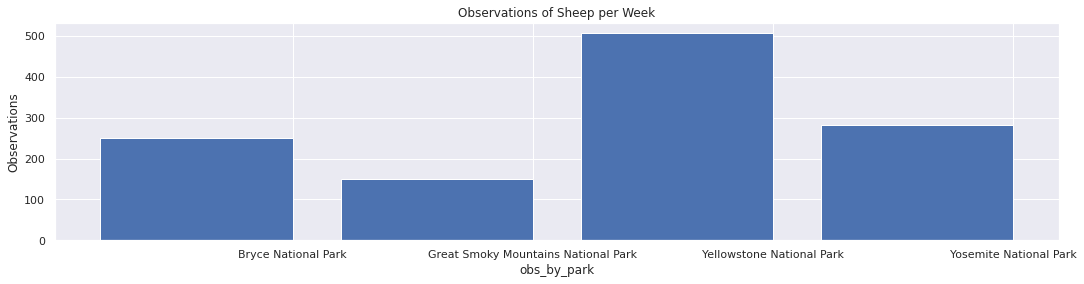

In [40]:
plt.figure(figsize=(18, 4))
plt.bar(range(len(obs_by_park)), obs_by_park.observations.values)
ax = plt.subplot()
plt.xlabel('obs_by_park')
ax.set_xticks(0.4 + np.arange(len(obs_by_park)))
ax.set_xticklabels(obs_by_park.park_name.values)
plt.ylabel('Observations')
plt.title('Observations of Sheep per Week')
plt.show()

#import numpy as np
#ax.set_xticks(0.4 + np.arange(len(obs_by_park)))
# np.arrange produces an array, which you can add 0.4 to
# range would produce a list and you'd have to use list comprehension to add

Our scientists know that 15% of sheep at Bryce National Park have foot and mouth disease.  Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park.  The scientists want to test whether or not this program is working.  They want to be able to detect reductions of at least 5 percentage point.  For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

Use the sample size calculator at <a href="https://www.optimizely.com/sample-size-calculator/">Optimizely</a> to calculate the number of sheep that they would need to observe from each park.  Use the default level of significance (90%).
 
Remember that "Minimum Detectable Effect" is a percent of the baseline.

In [41]:
minimum_detectable_effect = 100 * 0.05 / 0.15

minimum_detectable_effect

33.333333333333336

How many weeks would you need to observe sheep at Bryce National Park in order to observe enough sheep?  How many weeks would you need to observe at Yellowstone National Park to observe enough sheep?


In [42]:
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


baseline conversion rate is 15, minimum d.e is 33.33%.
sample size is 510.
250 observations at Bryce in 7 days.
507 observations at yellowstone in 7 days.

In [0]:
Bryce = 510/250 
#2.04 weeks
Yellowstone = 510/507 
#Approx 1 week
Smokeys = 510/149
#3.42 weeks
Yosemite = 510/282 
#1.80 weeks